Hello everybody,
the field of Data Science is one of the most blooming in the present days.
Having the necessary skills makes one very sought after on the market job with offers coming in from all around the world.
But how can one differentiate between average positions and very good ones?
With this analysis, I want to make an initial selection based on common development indicators: we all know which are the countries that are more developed, but why not give a chance to other parts of the world without indulging in prejudices and ignorance?

I want to point out that I have allowed myself 10 hours tops to conduct this project, and I beg you to pardon me any English mistakes

Let's start by importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

We are gonna use the World Bank Development Indicators as the dataframe we are gonna direct our analysis to

We read in the dataset (obtained from https://www.kaggle.com/worldbank/world-development-indicators) as df

In [3]:
df = pd.read_csv("indicators.csv")

Let's perform a basic check to see it the import was successfull and to get a preliminary feel of the data

In [4]:
df.shape

(5656458, 6)

In [5]:
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [6]:
df.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


More information about indicators can be found here: https://www.kaggle.com/benhamner/indicators-in-data

More information about the countries can be found here: https://www.kaggle.com/benhamner/countries-in-the-wdi-data

As you could guess from the libraries we imported at the beginning, the machine learning algorithm we are gonna use is a k-means clustering one

Said that, it is then important to check if the Value variable is numeric in all the rows because the technique doesn't work with strings (it doesn't know how to calculate the distance between two)

In [7]:
np.isnan(df['Value']).any() 

False

Now we wanna subset the dataframe with values only pertaining to the most recent year, as we are not interested in the past

In [8]:
df['Year'].max()

2015

In [9]:
df = df[df['Year'] == 2015]

We are also not interested in the CountryCode and IndicatorCode variables

In [10]:
del df['Year']
del df['CountryCode']
del df['IndicatorCode']

Let's perform some sanity checks

In [11]:
df.shape

(14762, 3)

In [12]:
df.head()

,CountryName,IndicatorName,Value
5641696,Arab World,"Bird species, threatened",297.000000
5641697,Arab World,Business extent of disclosure index (0=less di...,5.666667
5641698,Arab World,Cost of business start-up procedures (% of GNI...,31.142857
5641699,Arab World,Depth of credit information index (0=low to 8=...,3.714286
5641700,Arab World,Distance to frontier score (0=lowest performan...,54.491905


In [13]:
df.tail()

,CountryName,IndicatorName,Value
5656453,Zimbabwe,Time required to register property (days),36.0
5656454,Zimbabwe,Time required to start a business (days),90.0
5656455,Zimbabwe,Time to prepare and pay taxes (hours),242.0
5656456,Zimbabwe,Time to resolve insolvency (years),3.3
5656457,Zimbabwe,Total tax rate (% of commercial profits),32.8


The last operation we need to do is to transform the dataset from long to wide (cfr. http://vita.had.co.nz/papers/tidy-data.pdf)

In [17]:
widedf = df.pivot(index='CountryName', columns='IndicatorName', values='Value')

In [18]:
widedf.shape

(246, 103)

In [19]:
widedf.head()

IndicatorName,Average time to clear exports through customs (days),Bank capital to assets ratio (%),Bank nonperforming loans to total gross loans (%),"Bird species, threatened",Business extent of disclosure index (0=less disclosure to 10=more disclosure),Cost of business start-up procedures (% of GNI per capita),Delay in obtaining an electrical connection (days),Depth of credit information index (0=low to 8=high),"Disbursements on external debt, long-term (DIS, current US$)",Distance to frontier score (0=lowest performance to 100=frontier),...,Time required to obtain an operating license (days),Time required to register property (days),Time required to start a business (days),Time spent dealing with the requirements of government regulations (% of senior management time),Time to prepare and pay taxes (hours),Time to resolve insolvency (years),Total tax rate (% of commercial profits),Urban poverty gap at national poverty lines (%),Urban poverty headcount ratio at national poverty lines (% of urban population),Value lost due to electrical outages (% of sales)
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,12.222749,13.488399,17.0,1.0,19.0,NaN,0.0,23323000.0,40.58,...,NaN,250.0,7.0,NaN,275.0,2.0,36.3,NaN,NaN,NaN
Albania,NaN,9.700000,20.900000,10.0,9.0,10.4,NaN,6.0,350193000.0,60.50,...,NaN,22.0,5.5,NaN,357.0,2.0,36.5,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,14.0,4.0,10.9,NaN,0.0,81867000.0,45.72,...,NaN,55.0,20.0,NaN,385.0,1.3,72.7,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
widedf.tail()

IndicatorName,Average time to clear exports through customs (days),Bank capital to assets ratio (%),Bank nonperforming loans to total gross loans (%),"Bird species, threatened",Business extent of disclosure index (0=less disclosure to 10=more disclosure),Cost of business start-up procedures (% of GNI per capita),Delay in obtaining an electrical connection (days),Depth of credit information index (0=low to 8=high),"Disbursements on external debt, long-term (DIS, current US$)",Distance to frontier score (0=lowest performance to 100=frontier),...,Time required to obtain an operating license (days),Time required to register property (days),Time required to start a business (days),Time spent dealing with the requirements of government regulations (% of senior management time),Time to prepare and pay taxes (hours),Time to resolve insolvency (years),Total tax rate (% of commercial profits),Urban poverty gap at national poverty lines (%),Urban poverty headcount ratio at national poverty lines (% of urban population),Value lost due to electrical outages (% of sales)
CountryName,,,,,,,,,,,,,,,,,,,,,
West Bank and Gaza,NaN,9.674752,2.487018,13.0,6.000000,82.500000,NaN,8.000000,NaN,54.830000,...,NaN,49.000000,44.000000,NaN,162.000000,NaN,15.300000,NaN,NaN,NaN
World,NaN,NaN,NaN,4393.0,5.525926,26.065079,NaN,4.375661,NaN,61.027778,...,NaN,48.335676,20.442328,NaN,260.712698,2.576786,40.751323,NaN,NaN,NaN
"Yemen, Rep.",NaN,NaN,NaN,18.0,6.000000,68.000000,NaN,0.000000,537722000.0,44.540000,...,NaN,19.000000,40.000000,NaN,248.000000,3.000000,33.100000,NaN,NaN,NaN
Zambia,NaN,NaN,NaN,18.0,4.000000,33.600000,NaN,8.000000,763274000.0,60.500000,...,NaN,45.000000,7.500000,NaN,157.000000,2.400000,18.600000,NaN,NaN,NaN
Zimbabwe,NaN,NaN,NaN,17.0,8.000000,112.000000,NaN,5.000000,83777000.0,48.170000,...,NaN,36.000000,90.000000,NaN,242.000000,3.300000,32.800000,NaN,NaN,NaN


We can see that we have a lot on missing values, let's see it dropping them does not cause to lose too much information

In [21]:
df2 = widedf.dropna()

In [22]:
df2.shape

(0, 103)

Well, is seems that every country has a missing value in some variable, so this is not a viable way

Let's calculate the percentage of Nan for every column and sort them by descending order

In [23]:
(widedf.isnull().sum()/len(widedf)).sort_values()

IndicatorName
Mammal species, threatened                                                                          0.004065
Bird species, threatened                                                                            0.004065
Fish species, threatened                                                                            0.004065
Plant species (higher), threatened                                                                  0.004065
Improved water source, urban (% of urban population with access)                                    0.077236
Mortality rate, under-5, male (per 1,000 live births)                                               0.085366
Mortality rate, infant (per 1,000 live births)                                                      0.085366
Mortality rate, infant, male (per 1,000 live births)                                                0.085366
Mortality rate, infant, female (per 1,000 live births)                                              0.085366
Morta

It seems that we must impute them, it's not the optimal solution but it will do

We choose to impute them by the mean of the columns

In [24]:
widedf = widedf.fillna(widedf.mean())

In [25]:
widedf.head()

IndicatorName,Average time to clear exports through customs (days),Bank capital to assets ratio (%),Bank nonperforming loans to total gross loans (%),"Bird species, threatened",Business extent of disclosure index (0=less disclosure to 10=more disclosure),Cost of business start-up procedures (% of GNI per capita),Delay in obtaining an electrical connection (days),Depth of credit information index (0=low to 8=high),"Disbursements on external debt, long-term (DIS, current US$)",Distance to frontier score (0=lowest performance to 100=frontier),...,Time required to obtain an operating license (days),Time required to register property (days),Time required to start a business (days),Time spent dealing with the requirements of government regulations (% of senior management time),Time to prepare and pay taxes (hours),Time to resolve insolvency (years),Total tax rate (% of commercial profits),Urban poverty gap at national poverty lines (%),Urban poverty headcount ratio at national poverty lines (% of urban population),Value lost due to electrical outages (% of sales)
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,12.7,12.222749,13.488399,17.0,1.00000,19.000000,21.3,0.000000,2.332300e+07,40.580000,...,1.2,250.000000,7.000000,28.8,275.000000,2.000000,36.300000,9.4,27.65,3.7
Albania,12.7,9.700000,20.900000,10.0,9.00000,10.400000,21.3,6.000000,3.501930e+08,60.500000,...,1.2,22.000000,5.500000,28.8,357.000000,2.000000,36.500000,9.4,27.65,3.7
Algeria,12.7,9.748315,7.095081,14.0,4.00000,10.900000,21.3,0.000000,8.186700e+07,45.720000,...,1.2,55.000000,20.000000,28.8,385.000000,1.300000,72.700000,9.4,27.65,3.7
American Samoa,12.7,9.748315,7.095081,8.0,5.48251,26.347859,21.3,4.312211,1.364533e+10,60.903378,...,1.2,48.987811,20.395162,28.8,258.842071,2.580909,40.809904,9.4,27.65,3.7
Andorra,12.7,9.748315,7.095081,2.0,5.48251,26.347859,21.3,4.312211,1.364533e+10,60.903378,...,1.2,48.987811,20.395162,28.8,258.842071,2.580909,40.809904,9.4,27.65,3.7


In [26]:
widedf.tail()

IndicatorName,Average time to clear exports through customs (days),Bank capital to assets ratio (%),Bank nonperforming loans to total gross loans (%),"Bird species, threatened",Business extent of disclosure index (0=less disclosure to 10=more disclosure),Cost of business start-up procedures (% of GNI per capita),Delay in obtaining an electrical connection (days),Depth of credit information index (0=low to 8=high),"Disbursements on external debt, long-term (DIS, current US$)",Distance to frontier score (0=lowest performance to 100=frontier),...,Time required to obtain an operating license (days),Time required to register property (days),Time required to start a business (days),Time spent dealing with the requirements of government regulations (% of senior management time),Time to prepare and pay taxes (hours),Time to resolve insolvency (years),Total tax rate (% of commercial profits),Urban poverty gap at national poverty lines (%),Urban poverty headcount ratio at national poverty lines (% of urban population),Value lost due to electrical outages (% of sales)
CountryName,,,,,,,,,,,,,,,,,,,,,
West Bank and Gaza,12.7,9.674752,2.487018,13.0,6.000000,82.500000,21.3,8.000000,1.364533e+10,54.830000,...,1.2,49.000000,44.000000,28.8,162.000000,2.580909,15.300000,9.4,27.65,3.7
World,12.7,9.748315,7.095081,4393.0,5.525926,26.065079,21.3,4.375661,1.364533e+10,61.027778,...,1.2,48.335676,20.442328,28.8,260.712698,2.576786,40.751323,9.4,27.65,3.7
"Yemen, Rep.",12.7,9.748315,7.095081,18.0,6.000000,68.000000,21.3,0.000000,5.377220e+08,44.540000,...,1.2,19.000000,40.000000,28.8,248.000000,3.000000,33.100000,9.4,27.65,3.7
Zambia,12.7,9.748315,7.095081,18.0,4.000000,33.600000,21.3,8.000000,7.632740e+08,60.500000,...,1.2,45.000000,7.500000,28.8,157.000000,2.400000,18.600000,9.4,27.65,3.7
Zimbabwe,12.7,9.748315,7.095081,17.0,8.000000,112.000000,21.3,5.000000,8.377700e+07,48.170000,...,1.2,36.000000,90.000000,28.8,242.000000,3.300000,32.800000,9.4,27.65,3.7


Let's scale the variables, as we don't want the biggest ones to drive the model

In [27]:
scaleddf = StandardScaler().fit_transform(widedf)

We will now run the algorithm with a number of clusters equal to 10, as 24 countries together on average is a good number to examine

In [28]:
kmeans = KMeans(n_clusters = 10)
model = kmeans.fit(scaleddf)

In the next lines of code we are gonna create a numpy arrays of labels to attach to our dataframe

In [29]:
labels = kmeans.predict(scaleddf)

In [31]:
widedf['Cluster'] = labels

In [32]:
widedf.head()

IndicatorName,Average time to clear exports through customs (days),Bank capital to assets ratio (%),Bank nonperforming loans to total gross loans (%),"Bird species, threatened",Business extent of disclosure index (0=less disclosure to 10=more disclosure),Cost of business start-up procedures (% of GNI per capita),Delay in obtaining an electrical connection (days),Depth of credit information index (0=low to 8=high),"Disbursements on external debt, long-term (DIS, current US$)",Distance to frontier score (0=lowest performance to 100=frontier),...,Time required to register property (days),Time required to start a business (days),Time spent dealing with the requirements of government regulations (% of senior management time),Time to prepare and pay taxes (hours),Time to resolve insolvency (years),Total tax rate (% of commercial profits),Urban poverty gap at national poverty lines (%),Urban poverty headcount ratio at national poverty lines (% of urban population),Value lost due to electrical outages (% of sales),Cluster
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,12.7,12.222749,13.488399,17.0,1.00000,19.000000,21.3,0.000000,2.332300e+07,40.580000,...,250.000000,7.000000,28.8,275.000000,2.000000,36.300000,9.4,27.65,3.7,1
Albania,12.7,9.700000,20.900000,10.0,9.00000,10.400000,21.3,6.000000,3.501930e+08,60.500000,...,22.000000,5.500000,28.8,357.000000,2.000000,36.500000,9.4,27.65,3.7,2
Algeria,12.7,9.748315,7.095081,14.0,4.00000,10.900000,21.3,0.000000,8.186700e+07,45.720000,...,55.000000,20.000000,28.8,385.000000,1.300000,72.700000,9.4,27.65,3.7,0
American Samoa,12.7,9.748315,7.095081,8.0,5.48251,26.347859,21.3,4.312211,1.364533e+10,60.903378,...,48.987811,20.395162,28.8,258.842071,2.580909,40.809904,9.4,27.65,3.7,2
Andorra,12.7,9.748315,7.095081,2.0,5.48251,26.347859,21.3,4.312211,1.364533e+10,60.903378,...,48.987811,20.395162,28.8,258.842071,2.580909,40.809904,9.4,27.65,3.7,2


Now we can subset the original dataframe by clusters

Some clusters are really useless, but there is one that is really interesting as it groups together very diverse countries

In [43]:
widedf[widedf['Cluster'] == 9]

IndicatorName,Average time to clear exports through customs (days),Bank capital to assets ratio (%),Bank nonperforming loans to total gross loans (%),"Bird species, threatened",Business extent of disclosure index (0=less disclosure to 10=more disclosure),Cost of business start-up procedures (% of GNI per capita),Delay in obtaining an electrical connection (days),Depth of credit information index (0=low to 8=high),"Disbursements on external debt, long-term (DIS, current US$)",Distance to frontier score (0=lowest performance to 100=frontier),...,Time required to register property (days),Time required to start a business (days),Time spent dealing with the requirements of government regulations (% of senior management time),Time to prepare and pay taxes (hours),Time to resolve insolvency (years),Total tax rate (% of commercial profits),Urban poverty gap at national poverty lines (%),Urban poverty headcount ratio at national poverty lines (% of urban population),Value lost due to electrical outages (% of sales),Cluster
CountryName,,,,,,,,,,,,,,,,,,,,,
Armenia,12.7,14.280815,9.129112,15.0,5.000000,1.000000,21.3,8.000000,1.712400e+08,74.220000,...,7.000000,3.000000,28.8,313.000000,1.900000,19.900000,9.4,27.65,3.7,9
Australia,12.7,6.066661,1.048987,50.0,8.000000,0.700000,21.3,7.000000,1.364533e+10,80.080000,...,4.500000,2.500000,28.8,105.000000,1.000000,47.600000,9.4,27.65,3.7,9
Austria,12.7,6.652117,3.525212,12.0,5.000000,0.300000,21.3,7.000000,1.364533e+10,78.380000,...,20.500000,22.000000,28.8,166.000000,1.100000,51.700000,9.4,27.65,3.7,9
Bahrain,12.7,9.748315,7.095081,6.0,8.000000,0.800000,21.3,7.000000,1.364533e+10,66.810000,...,31.000000,9.000000,28.8,60.000000,2.500000,13.500000,9.4,27.65,3.7,9
Belarus,12.7,12.180932,5.089748,9.0,7.000000,0.900000,21.3,6.000000,3.811979e+09,72.330000,...,3.000000,3.000000,28.8,176.000000,3.000000,51.800000,9.4,27.65,3.7,9
Belgium,12.7,6.480491,3.962999,8.0,8.000000,4.800000,21.3,5.000000,1.364533e+10,72.500000,...,56.000000,4.000000,28.8,161.000000,0.900000,58.400000,9.4,27.65,3.7,9
Bulgaria,12.7,9.748315,7.095081,18.0,10.000000,0.700000,21.3,5.000000,2.397970e+08,73.720000,...,11.000000,18.000000,28.8,423.000000,3.300000,27.000000,9.4,27.65,3.7,9
Canada,12.7,4.901776,0.512870,15.0,8.000000,0.400000,21.3,8.000000,1.364533e+10,80.070000,...,16.500000,1.500000,28.8,131.000000,0.800000,21.100000,9.4,27.65,3.7,9
Central Europe and the Baltics,12.7,10.688635,6.153778,130.0,5.545455,3.372727,21.3,6.272727,1.364533e+10,75.531818,...,25.000000,10.727273,28.8,238.090909,2.581818,39.836364,9.4,27.65,3.7,9


Let us plot our clusters, as an image counts as 1000 words

In [44]:
from ggplot import *

C:\Users\JohnJohn\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\JohnJohn\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\JohnJohn\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [47]:
p = ggplot(widedf, aes('Cluster')) + geom_bar(aes(fill = 'blue', alpha = 0.5)) + ggtitle("Distribution of Countries by Clusters")


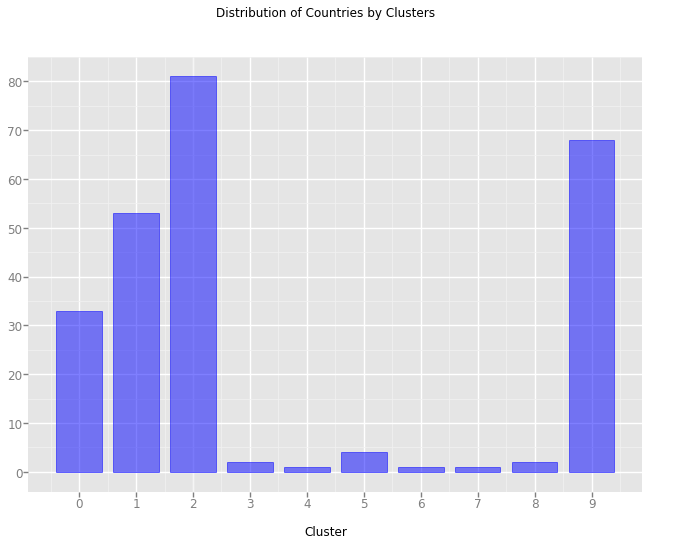

<ggplot: (58458925288)>


In [48]:
print(p)

We can rerun the algorithm excluding the countries inside clusters we think are not interesting, this way the second run will be of finer grains.

We decided to use all of the variables we have to gain bredth in our analysis, but of course there are some that can be dropped altogether if are deemed of no interests for the user

There are many various steps one can apply now: delete some variables of choice, delete some rows (like World, Euro area, middle income, etc...) and then rerun the algorithm with a equal or different number of clusters.

When we set for a cluster that we really like, we can employ an analysis of the trend of the countries of that cluster, reinserting a number of years that we think is useful, like 5 or 10, and running some forecasting techniques.

Kaggle conducted a very interesting survey on the state of Data Science in 2017 (https://www.kaggle.com/surveys/2017), there are surely some datas there that we can merge in to gain some more insights

When we are done with our analytical mindset, let's use our heart a little and give a score for every candidate country in parameters like weather, nature, culture, food, nightlife and anything else we care about.

If we treat those parameters like variables of a data frame, it will be enough to sum each rows to have a total score, a clear indication of which country seems like a good choice to build our career in and maybe that is a country we would have never thought before using a conventional mindset.

Thanks for reading